# Demonstration 2: Balloon Analog Risk Task

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import BART
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)
img_dir = os.path.join('..','figures')
%matplotlib inline

## Value Iteration

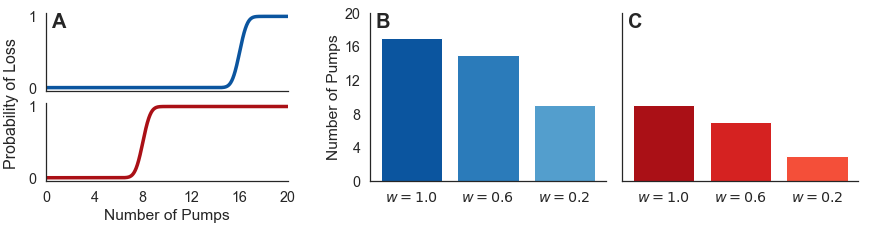

In [2]:
from sisyphus.mdp import ValueIteration
from scipy.stats import norm

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
weights = [1.0, 0.6, 0.2]

## Environment parameters.
pumps = 20
means = [16, 8] 
sd = 0.5

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize figure.
fig = plt.figure(figsize=(12,3))
x = np.linspace(0,pumps,1000)    

## Initialize plots and divider.
gs1 = gridspec.GridSpec(2,1)
gs1.update(left=0.05, right=0.33, bottom=0.18, top=0.96, hspace=0.15, wspace=0)

gs2 = gridspec.GridSpec(1,2)
gs2.update(left=0.425, right=0.99, bottom=0.18, top=0.96, hspace=0, wspace=0.07)

## Define color palettes.
blues = sns.color_palette('Blues_r', n_colors=6).as_hex()
reds = sns.color_palette('Reds_r', n_colors=6).as_hex()

for i, (mu, palette, label) in enumerate(zip(means,[blues,reds], ['B','C'])):
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Environment setup and visualization.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Initialize environment.
    gym = BART(pumps=pumps, mu=mu, sd=sd)
    
    ## Plot environment.
    ax = plt.subplot(gs1[i])
    ax.plot(x, norm(means[i],sd).cdf(x), color=palette[0], lw=3.5)
    ax.set(xlim=(0,pumps), xticks=[], yticks=[0,1])

    if not i: ax.annotate('A', (0,0), (0.025,1), 'axes fraction', fontsize=20, 
                          fontweight='bold', ha='left', va='top')
    else: ax.set(xticks=np.arange(0,pumps+1,4), xlabel='Number of Pumps')
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Value iteration and visualization.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Initialize canvas.
    ax = plt.subplot(gs2[i])
    ax.set(ylim=(0,pumps))
    
    ## Iterate over weights.
    for j, w in enumerate(weights):
    
        ## Initialize value iteration.
        qvi = ValueIteration(policy='betamax', gamma=1.0, beta=w)

        ## Solve for Q-values.
        qvi = qvi.fit(gym)

        ## Solve for policy.
        pi = qvi.pi
        n_pumps = len(pi) - 1
                
        ## 
        ax.bar(j,n_pumps,color=palette[j])
        
    ## Add information.
    ax.set(xticks=[0,1,2], xticklabels=['$w = %0.1f$' %w for w in weights], yticks=[])
    if not i: ax.set(yticks=np.arange(0,pumps+1,4), ylabel='Number of Pumps')
    ax.annotate(label, (0,0), (0.025,1), 'axes fraction', fontsize=20, 
                fontweight='bold', ha='left', va='top')
        
## Add joint label.
ax.annotate('Probability of Loss', (0,0), (0.005,0.55), 'figure fraction', rotation=90, 
            fontsize=16, ha='left', va='center')

sns.despine()
plt.savefig(os.path.join(img_dir, '02_bart.png'), dpi=180)